# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#membaca dataset https://drive.google.com/file/d/1sLuMhVYlJu37OSb9Ms16qWNnG8G4b8i3/view?usp=sharing
file_id = "1sLuMhVYlJu37OSb9Ms16qWNnG8G4b8i3"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset_clustering.csv"

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1sLuMhVYlJu37OSb9Ms16qWNnG8G4b8i3
From (redirected): https://drive.google.com/uc?id=1sLuMhVYlJu37OSb9Ms16qWNnG8G4b8i3&confirm=t&uuid=5c48c5d7-331d-41d6-bfe8-9289bf38463b
To: /content/dataset.csv
100%|██████████| 789M/789M [00:11<00:00, 67.8MB/s]


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [4]:
#Identifikasi dan analisis data yang hilang (missing values)
df.isna().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [5]:
#Analisis distribusi variabel numerik dengan statistik deskriptif
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


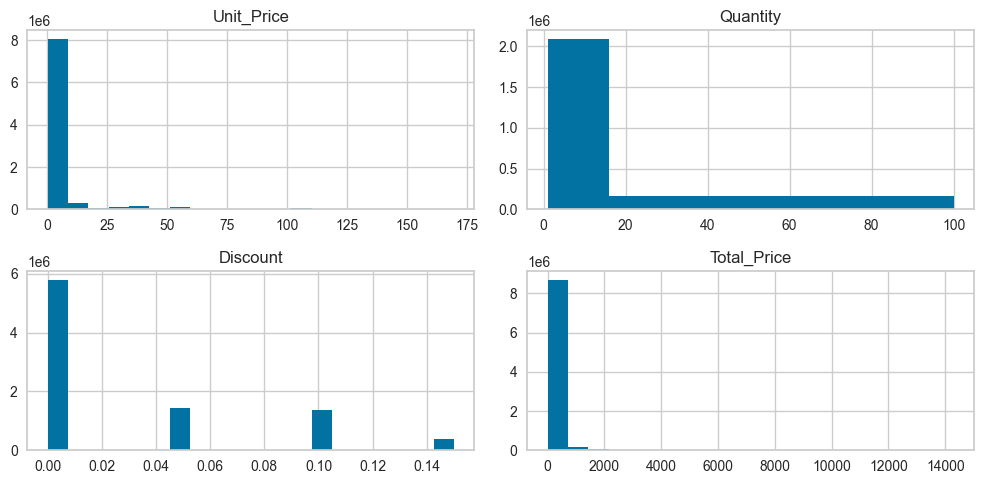

In [ ]:
# Histogram untuk melihat distribusi fitur numerik
numerical_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
df[numerical_features].hist(figsize=(10, 5), bins=20)
plt.tight_layout()
plt.show()

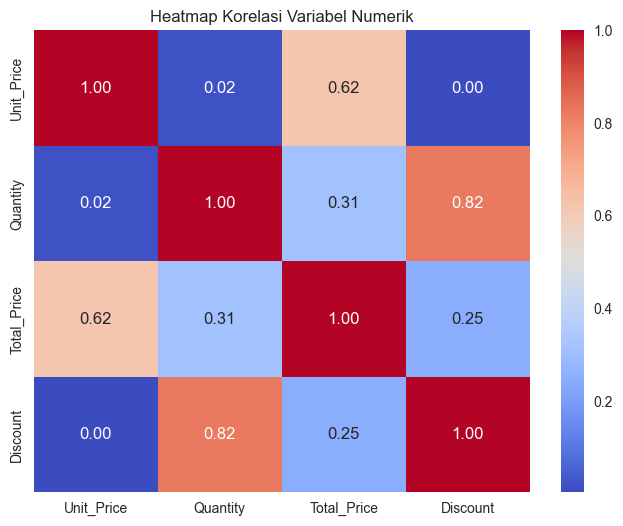

In [ ]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

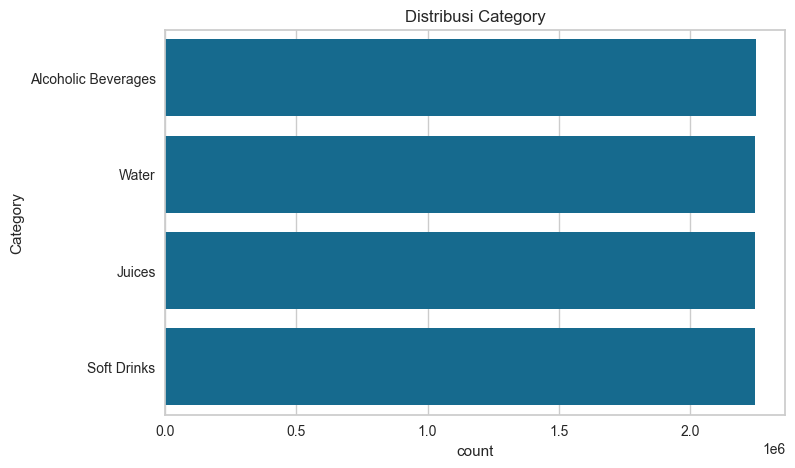

In [ ]:
#Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)  # Ubah x menjadi y
plt.title('Distribusi Category')
plt.show()

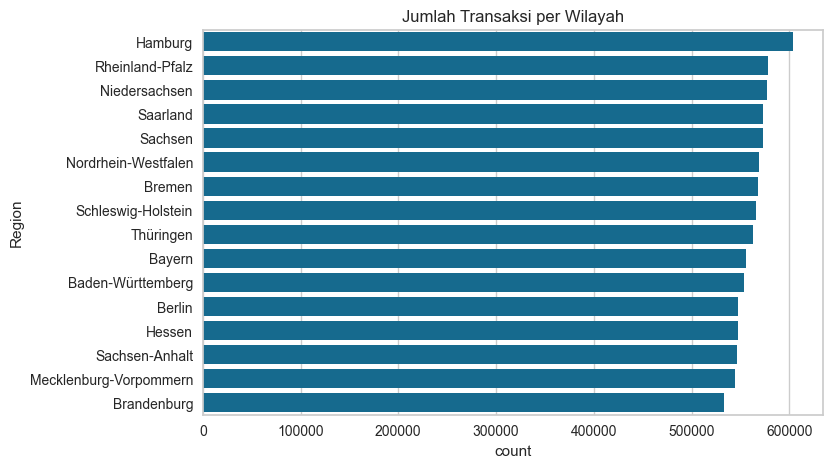

In [ ]:
#Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index)
plt.title('Jumlah Transaksi per Wilayah')
plt.show()

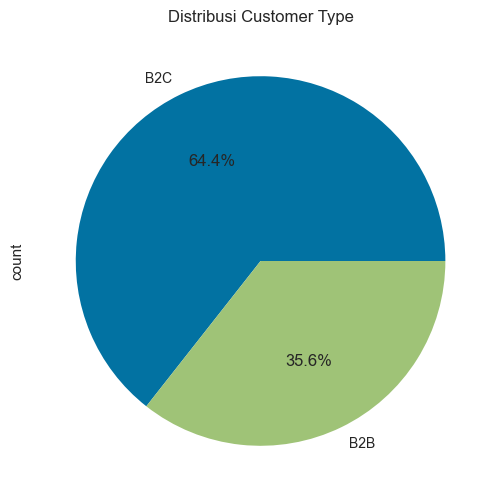

In [ ]:
#Pie Chart untuk menampilkan Tipe Customer
df['Customer_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribusi Customer Type')
plt.show()

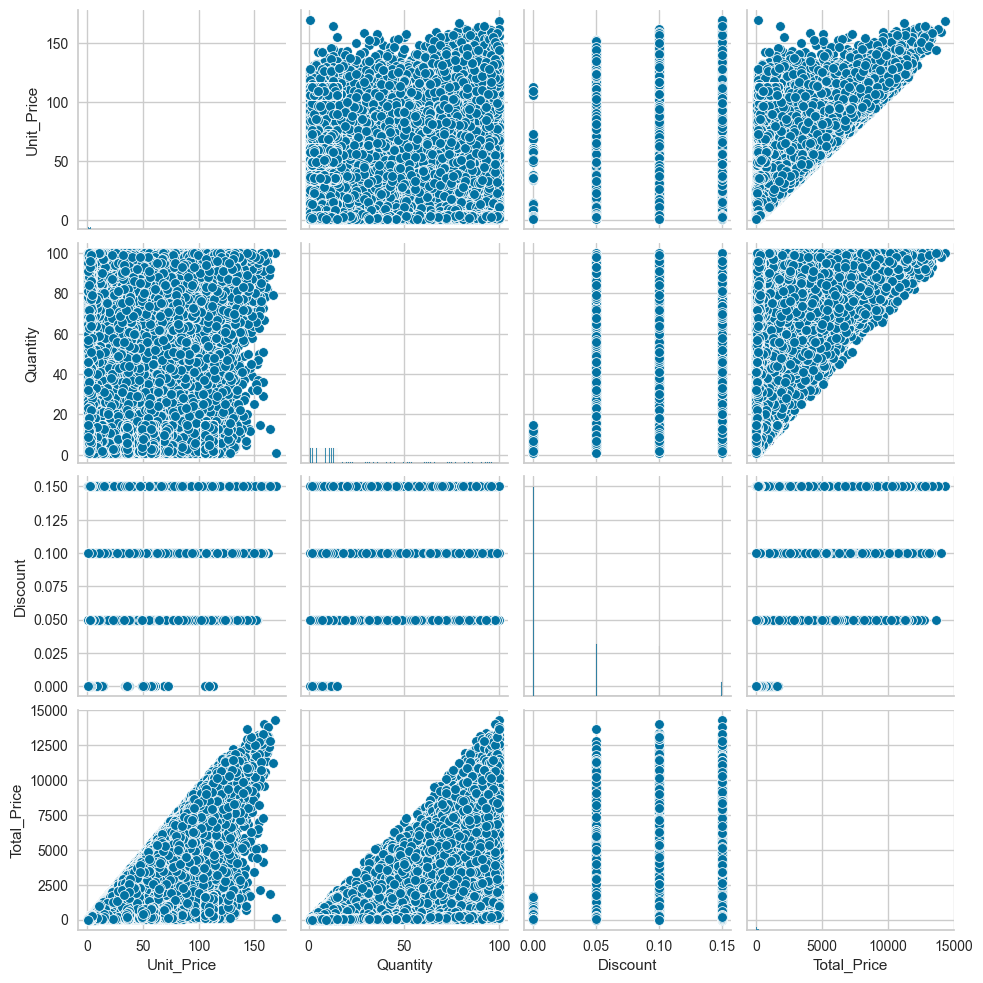

In [ ]:
#Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel
sns.pairplot(df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [6]:
#Mengubah kolom 'Category', 'Region', 'Customer_Type', 'Order_ID', 'Customer_ID' dari object menjadi category
df["Category"] = df["Category"].astype("category")
df["Region"] = df["Region"].astype("category")
df["Customer_Type"] = df["Customer_Type"].astype("category")
df['Order_ID'] = df['Order_ID'].astype('category')
df['Customer_ID'] = df['Customer_ID'].astype('category')
df['Product'] = df['Product'].astype('category')

In [7]:
#Konversi kolom 'Order_Date' dari object ke datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [8]:
# Mengecek jumlah data duplikat
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


In [9]:
#Pemilihan 5 Fitur (Numerikal & Kategorikal)
selected_features = ["Unit_Price", "Quantity", "Discount", "Total_Price", "Customer_Type"]
df_selected = df[selected_features]

In [10]:
# Pisahkan fitur numerik dan kategorikal
num_features = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
cat_features = ["Customer_Type"]

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Standardisasi fitur numerik
num_transformer = StandardScaler()


In [12]:
# One-Hot Encoding fitur kategorikal
cat_transformer = OneHotEncoder()

In [13]:
from sklearn.compose import ColumnTransformer
# Gabungkan preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

# Transform data
df_preprocessed = preprocessor.fit_transform(df_selected)

In [14]:
# Simpan kembali fitted transformers
scaler_fitted = preprocessor.named_transformers_["num"]
encoder_fitted = preprocessor.named_transformers_["cat"]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

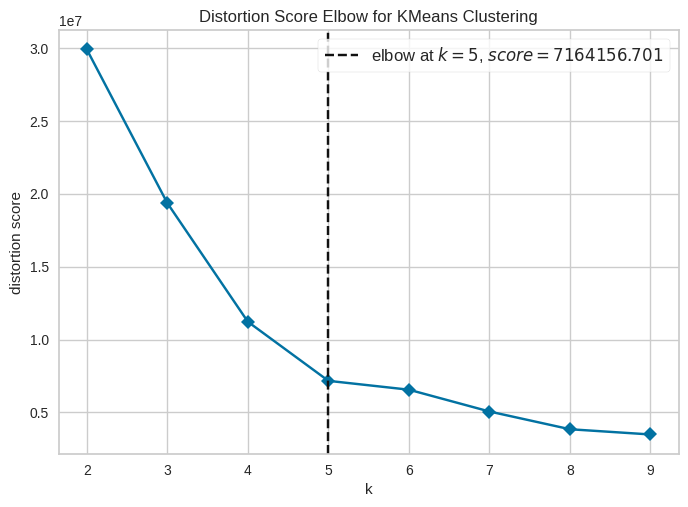

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Inisialisasi model KMeans tanpa menentukan jumlah cluster awal
kmeans = KMeans(random_state=42)

# Inisialisasi KElbowVisualizer untuk mencari jumlah cluster optimal (K) dari 1 sampai 10
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)

# Fit visualizer dengan data clustering yang sudah di-scale
visualizer.fit(df_preprocessed)

# Menampilkan grafik elbow
visualizer.show()

In [19]:
# Pilih k berdasarkan hasil elbow (misal, k=3)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_preprocessed)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [20]:
silhouette_before = silhouette_score(df_preprocessed, cluster_labels, sample_size=500, random_state=42)
print(f"Silhouette Score sebelum Feature Selection: {silhouette_before:.2f}")

Silhouette Score sebelum Feature Selection: 0.69


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
from sklearn.decomposition import PCA
#Feature Selection dengan PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_preprocessed)

In [22]:
# Clustering ulang dengan fitur terpilih
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca)

In [23]:
# Evaluasi ulang
silhouette_after = silhouette_score(df_pca, cluster_labels_pca,sample_size=500, random_state=42)
print(f"Silhouette Score setelah Feature Selection: {silhouette_after:.2f}")

Silhouette Score setelah Feature Selection: 0.72


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


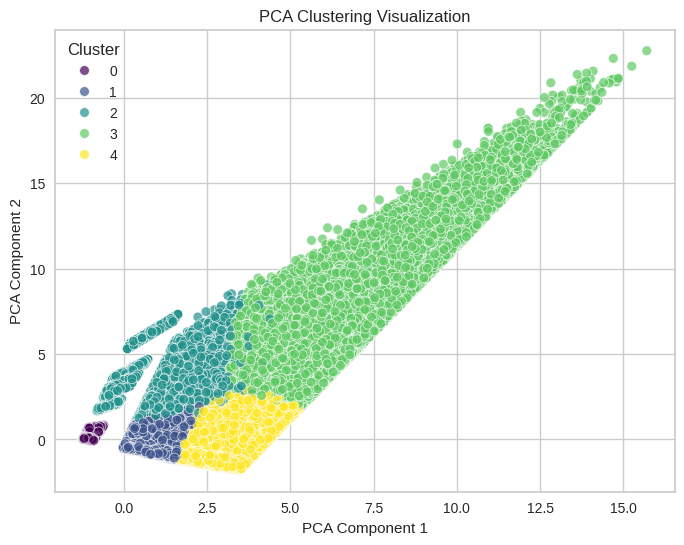

In [24]:
# Visualisasi PCA Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels_pca, palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [27]:
# Konversi hasil transformasi menjadi DataFrame
df_preprocessed_df = pd.DataFrame(df_preprocessed, columns=num_features + list(encoder_fitted.get_feature_names_out(cat_features)))

# Tampilkan beberapa baris pertama
print(df_preprocessed_df.head())

   Unit_Price  Quantity  Discount  Total_Price  Customer_Type_B2B  \
0   -0.282850  1.110387  1.568610    -0.101166                1.0   
1   -0.289653  2.486199  1.568610    -0.008601                1.0   
2   -0.316182  1.854069  0.452499    -0.097320                1.0   
3   -0.176731  1.333492  1.568610     0.078942                1.0   
4   -0.336590  0.441073  1.568610    -0.202756                1.0   

   Customer_Type_B2C  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [29]:
# Tambahkan label cluster ke DataFrame yang sudah dinormalisasi
df_preprocessed_df["Cluster"] = cluster_labels_pca


In [33]:
# Pastikan input ke inverse_transform adalah array numpy
categorical_original = encoder_fitted.inverse_transform(df_preprocessed_df[encoder_fitted.get_feature_names_out(cat_features)])

# Ubah hasilnya menjadi Series
df_preprocessed_df["Customer_Type"] = pd.Series(categorical_original.flatten(), index=df_preprocessed_df.index)

# Hapus kolom One-Hot Encoding (opsional)
df_preprocessed_df.drop(columns=encoder_fitted.get_feature_names_out(cat_features), inplace=True)

# Cek hasil setelah inverse transform
print(df_preprocessed_df.head())


   Unit_Price  Quantity  Discount  Total_Price  Cluster Customer_Type
0   -0.282850  1.110387  1.568610    -0.101166        4           B2B
1   -0.289653  2.486199  1.568610    -0.008601        4           B2B
2   -0.316182  1.854069  0.452499    -0.097320        1           B2B
3   -0.176731  1.333492  1.568610     0.078942        4           B2B
4   -0.336590  0.441073  1.568610    -0.202756        1           B2B


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
# Inverse transform fitur numerik ke bentuk aslinya
df_preprocessed_df[num_features] = scaler_fitted.inverse_transform(df_preprocessed_df[num_features])

# Cek hasil setelah inverse transform
print(df_preprocessed_df.head())


   Unit_Price  Quantity  Discount  Total_Price  Cluster Customer_Type
0        1.66      53.0      0.10        79.18        4           B2B
1        1.56      90.0      0.10       126.36        4           B2B
2        1.17      73.0      0.05        81.14        1           B2B
3        3.22      59.0      0.10       170.98        4           B2B
4        0.87      35.0      0.10        27.40        1           B2B


In [38]:
# Tambahkan label cluster ke dataset asli
df["Cluster"] = df_preprocessed_df["Cluster"]

In [39]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,4
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,4
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,1
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,4
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [45]:
selected_features = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
cluster_stats = df.groupby("Cluster")[selected_features].agg(['mean', 'std'])

# Tampilkan hasil
print(cluster_stats.head())



        Unit_Price              Quantity             Discount            \
              mean        std       mean        std      mean       std   
Cluster                                                                   
0         2.355713   2.402311   7.998463   4.320835  0.000000  0.000000   
1         2.761583   4.552287  28.504074  17.975141  0.061006  0.022048   
2        56.576803  26.353571  10.336837   9.188414  0.007817  0.022596   
3        58.902808  25.637087  76.900473  16.566138  0.100511  0.031841   
4         3.434108   5.183588  73.863670  17.550081  0.107928  0.026756   

         Total_Price               
                mean          std  
Cluster                            
0          18.842064    24.089815  
1          68.798747   118.032373  
2         541.937436   439.935378  
3        3976.886969  1885.352762  
4         216.936589   299.592667  


Tulis hasil interpretasinya di sini.
1. Cluster 1:
- Rata-rata Unit Price: 2.76
- Rata-rata Quantity: 28.50
- Rata-rata Discount: 0.06
- Rata-rata Total Price: 68.80
- Analisis:
Cluster ini terdiri dari pelanggan yang membeli dalam jumlah sedang dengan harga unit rendah hingga menengah. Diskon mulai diberikan, yang mungkin menandakan pelanggan setia atau pembelian dalam jumlah tertentu.

2. Cluster 2:
- Rata-rata Unit Price: 56.58
- Rata-rata Quantity: 10.33
- Rata-rata Discount: 0.01
- Rata-rata Total Price: 541.94
- Analisis:
Cluster ini menunjukkan pelanggan yang membeli produk dengan harga unit yang sangat tinggi tetapi dalam jumlah kecil. Diskon hampir tidak diberikan, yang bisa mengindikasikan produk premium atau eksklusif.

3. Cluster 3:
- Rata-rata Unit Price: 58.90
- Rata-rata Quantity: 76.90
- Rata-rata Discount: 0.10
- Rata-rata Total Price: 3976.89
- Analisis:
Cluster ini mencerminkan transaksi dalam jumlah besar dengan harga unit tinggi. Diskon yang diberikan lebih besar, menunjukkan bahwa ini bisa merupakan pembelian dalam skala besar (misalnya, pelanggan grosir atau perusahaan B2B).

4. Cluster 4:
- Rata-rata Unit Price: 3.43
- Rata-rata Quantity: 73.86
- Rata-rata Discount: 0.11
- Rata-rata Total Price: 216.94
- Analisis:
Cluster ini berisi pelanggan yang membeli dalam jumlah besar tetapi dengan harga unit rendah. Diskon cukup tinggi, yang mungkin menunjukkan program promosi atau pelanggan tetap.

Kesimpulan:
- Cluster 0 & 1: Pembelian kecil hingga menengah dengan harga unit rendah.
- Cluster 2: Pembelian kecil namun dengan harga premium, menunjukkan produk eksklusif.
- Cluster 3: Pembelian dalam jumlah besar dengan harga premium, kemungkinan pelanggan bisnis.
- Cluster 4: Pembelian dalam jumlah besar dengan harga unit rendah, menunjukkan diskon besar bagi pelanggan setia.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
# Simpan dataset asli yang sudah ditambahkan kolom Cluster ke file CSV
df.to_csv("dataset_inisiasi.csv", index=False)